In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OrdinalEncoder
#



### Airline Passenger Satisfaction
https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data



In [3]:
df_train = pd.read_csv('trainCustomerSupervised.csv')
df_test = pd.read_csv('testCustomerSupervised.csv')

In [4]:
df = pd.concat([df_train, df_test], axis = 0, ignore_index=True)

In [5]:
df.shape

(129880, 25)

In [6]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
df.drop('Unnamed: 0',axis = 1, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.00,844.0,1744.00,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.00,3.0,4.00,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.00,3.0,4.00,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.00,3.0,4.00,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.00,3.0,4.00,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.00,4.0,5.00,5.0


In [10]:
df.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

Not so many datapoints are NULL, so we can safely delete them without having any impact on 
the dataset information

In [11]:
df.dropna(inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129487 non-null  int64  
 1   Gender                             129487 non-null  object 
 2   Customer Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight Distance                    129487 non-null  int64  
 7   Inflight wifi service              129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Ease of Online booking             129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Food and drink                     1294

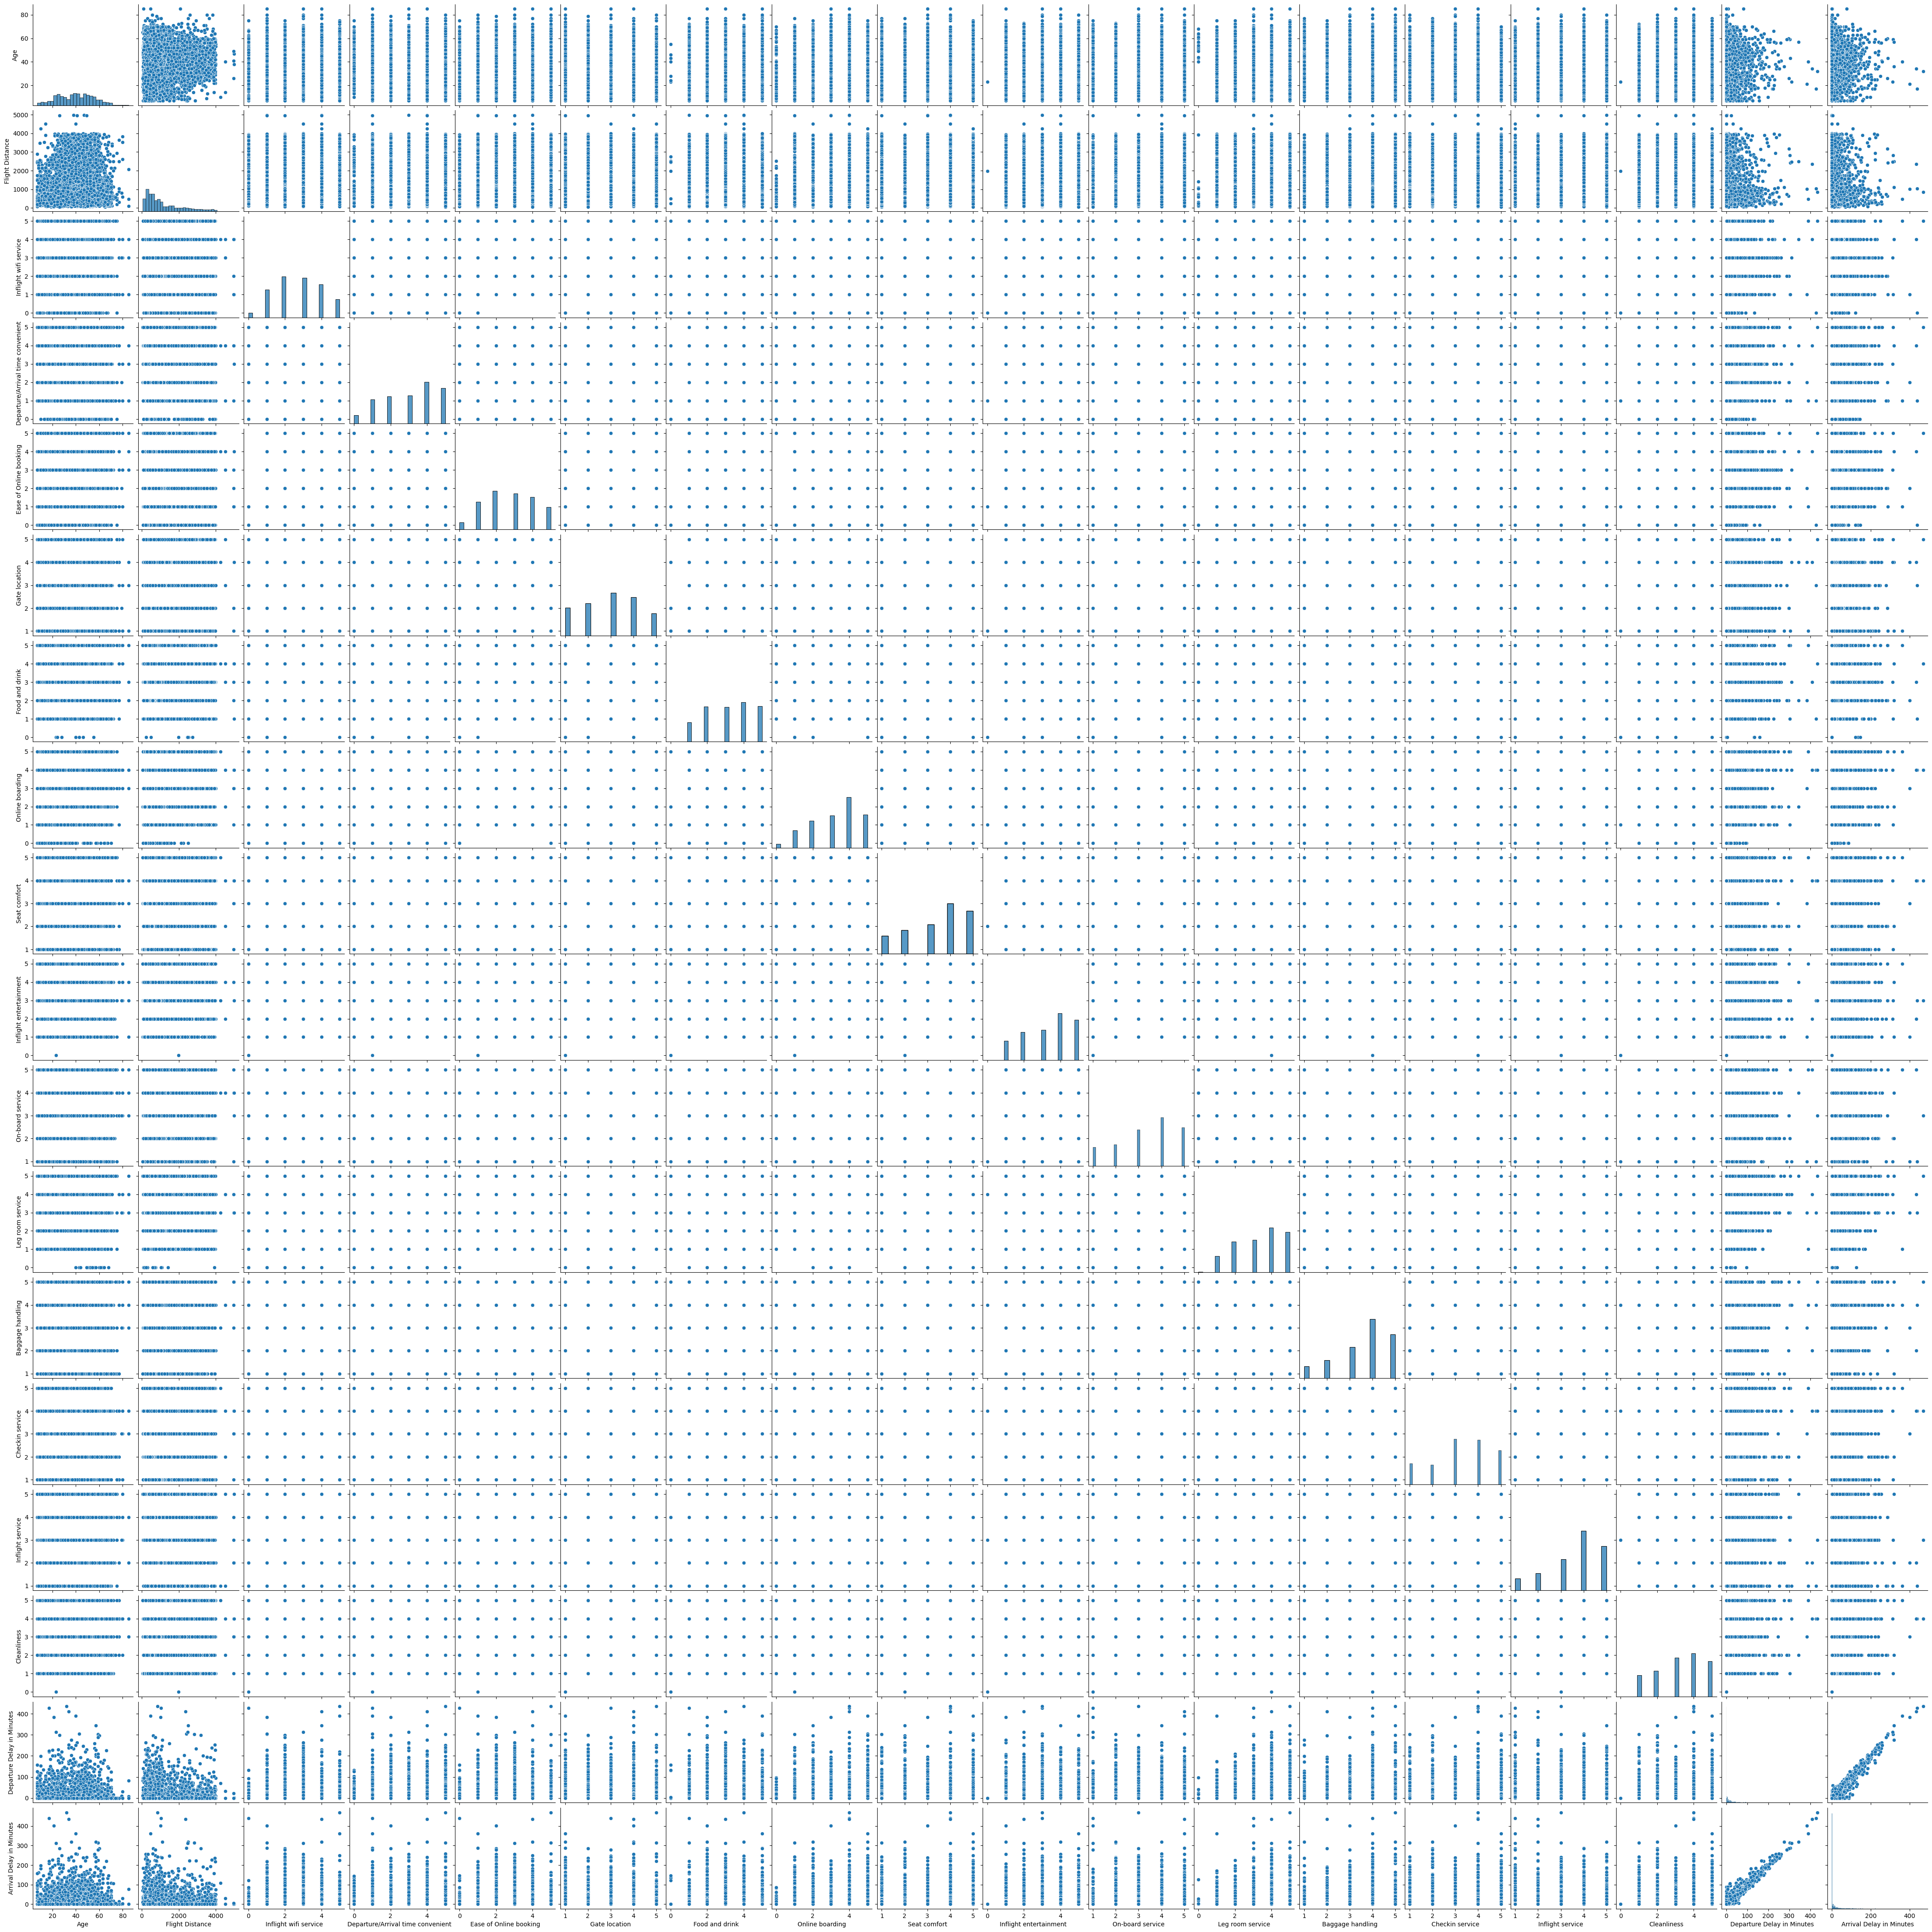

In [195]:
sample_df = df.sample(n=5000, random_state=42)
sns.pairplot(sample_df.drop('id', axis = 1))
plt.show()
None

In [13]:
#Find the categorical features
#Find Categorical columns
df_cat = df.select_dtypes(include='object')
df_cat.columns


Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [14]:
#Find numeric variables
df_num = df.select_dtypes(include='number')
df_num.columns

Index(['id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [15]:
#Find for each of the categorical values the discrete values
#Find the unique values of each categorical feature
df.apply(lambda col: col.unique())

id                                   [70172, 5047, 110028, 24026, 119299, 111157, 8...
Gender                                                                  [Male, Female]
Customer Type                                      [Loyal Customer, disloyal Customer]
Age                                  [13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 3...
Type of Travel                                      [Personal Travel, Business travel]
Class                                                        [Eco Plus, Business, Eco]
Flight Distance                      [460, 235, 1142, 562, 214, 1180, 1276, 2035, 8...
Inflight wifi service                                               [3, 2, 4, 1, 5, 0]
Departure/Arrival time convenient                                   [4, 2, 5, 3, 1, 0]
Ease of Online booking                                              [3, 2, 5, 4, 1, 0]
Gate location                                                       [1, 3, 2, 5, 4, 0]
Food and drink                             

We see that many features are from a survey. From the pairplots we see that we have a distribution of voting values. 
But lets see if we have sparcity in some features

In [16]:
# Check for the percentage of zeros or NaNs in each column
zero_percentage = (df == 0).sum() / df.shape[0] * 100
nan_percentage = df.isna().sum() / df.shape[0] * 100

# Combine both into a sparsity DataFrame
sparsity = pd.DataFrame({'Zero Percentage': zero_percentage, 'NaN Percentage': nan_percentage})

# Display the result
print(sparsity)

                                   Zero Percentage  NaN Percentage
id                                        0.000000             0.0
Gender                                    0.000000             0.0
Customer Type                             0.000000             0.0
Age                                       0.000000             0.0
Type of Travel                            0.000000             0.0
Class                                     0.000000             0.0
Flight Distance                           0.000000             0.0
Inflight wifi service                     3.018064             0.0
Departure/Arrival time convenient         5.146463             0.0
Ease of Online booking                    4.375729             0.0
Gate location                             0.000772             0.0
Food and drink                            0.100396             0.0
Online boarding                           2.371667             0.0
Seat comfort                              0.000772            

56% of the flights have NO DELAY. So half of this column is with 0

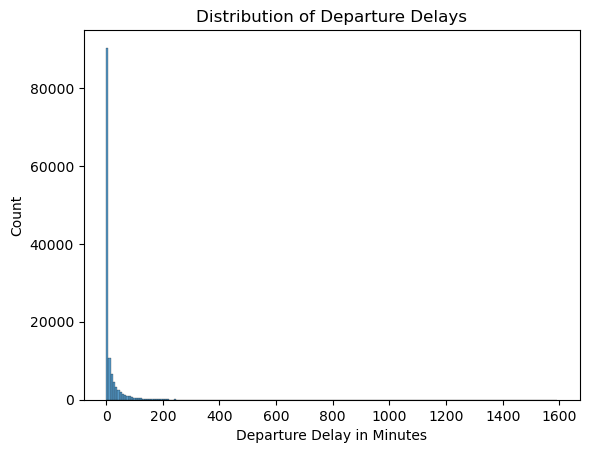

In [17]:
# Histogram to visualize the distribution of 'Departure Delay in Minutes'
sns.histplot(df['Departure Delay in Minutes'], bins = 200)
plt.title('Distribution of Departure Delays')
plt.show()

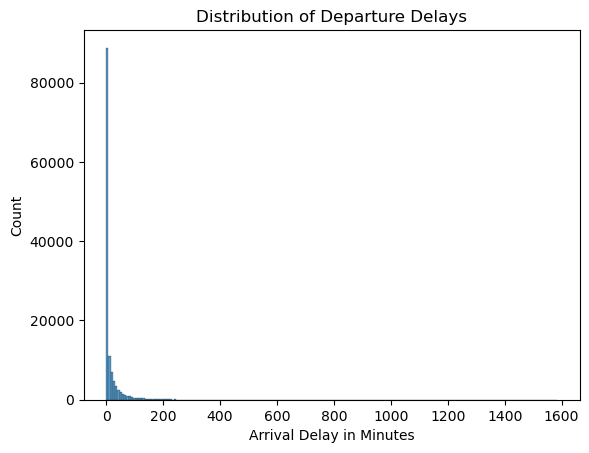

In [18]:
# Histogram to visualize the distribution of 'Departure Delay in Minutes'
sns.histplot(df['Arrival Delay in Minutes'], bins = 200)
plt.title('Distribution of Departure Delays')
plt.show()

the dataset is skewed toward "no delays". We will use Feature Engineering to create a new feature which we will call
Delayed 1= delayed 0=not delayed.

In [19]:
df['Delayed'] = df['Departure Delay in Minutes'].apply(lambda x: 1 if x > 0 else 0)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129487 non-null  int64  
 1   Gender                             129487 non-null  object 
 2   Customer Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight Distance                    129487 non-null  int64  
 7   Inflight wifi service              129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Ease of Online booking             129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Food and drink                     1294

Find highly correlated pairs

In [48]:
dfi = df.drop('id',axis = 1)

C:\Users\kathe\AppData\Local\Temp\ipykernel_50380\3361486430.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dfi.corr().abs()  # Use absolute values of the correlations


Highly correlated pairs (correlation > 0.95):
('Arrival Delay in Minutes', 'Departure Delay in Minutes')


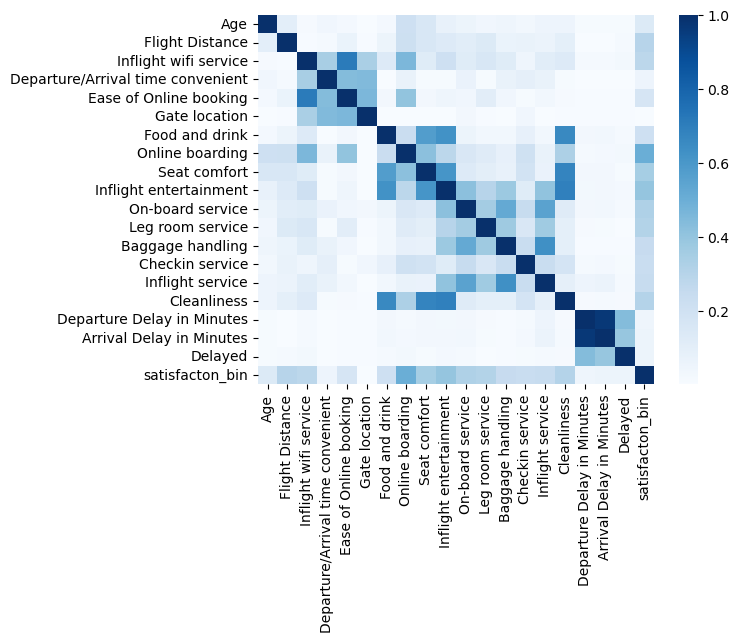

In [49]:
## See Correlation matrix
#plt.figure(figsize=(10, 6))
# Calculate the correlation matrix
corr_matrix = dfi.corr().abs()  # Use absolute values of the correlations
sns.heatmap(corr_matrix,  cmap='Blues')

# Select upper triangle of the correlation matrix (to avoid duplicate pairs)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index pairs where correlation is greater than 0.95
high_corr_pairs = [(column, index) for column in upper_triangle.columns for index in upper_triangle.index if upper_triangle.loc[index, column] > 0.90]

# Display highly correlated pairs
print("Highly correlated pairs (correlation > 0.95):")
for pair in high_corr_pairs:
    print(pair)

In [22]:
# Display highly correlated pairs
# Find index pairs where correlation is greater than 0.95
high_corr_pairs = [(column, index) for column in upper_triangle.columns for index in upper_triangle.index if upper_triangle.loc[index, column] > 0.96]
print("Highly correlated pairs (correlation > 0.96):")
for pair in high_corr_pairs:
    print(pair)

Highly correlated pairs (correlation > 0.96):
('Arrival Delay in Minutes', 'Departure Delay in Minutes')


We see that Arrival Delay in Minutes / Departure Delay in Minutes are highly correlated. Which is logical
Also we see a correlation of 'Inflight Wifi Service' with 'Ease of Online Booking'. We are going to discard the Departure Delay in Minutes : since the Arrival might have a bigger impact on satisfaction / disatisfaction since it may impact business/lodging/connection flights etc. Keep this in mind to do later in the MODEL training.

In [23]:
#df.drop('Departure Delay in Minutes', axis = 1, inplace = True)

### Exploratory Data Analysis

In [98]:
# Custom color palette (can use named palettes, hex codes, or a list of colors)
#palette = ['#3498db', '#e74c3c', '#2ecc71']  # You can adjust these color codes
palette = ['#3498db', '#006400', '#2ecc71']  # You can adjust these color codes

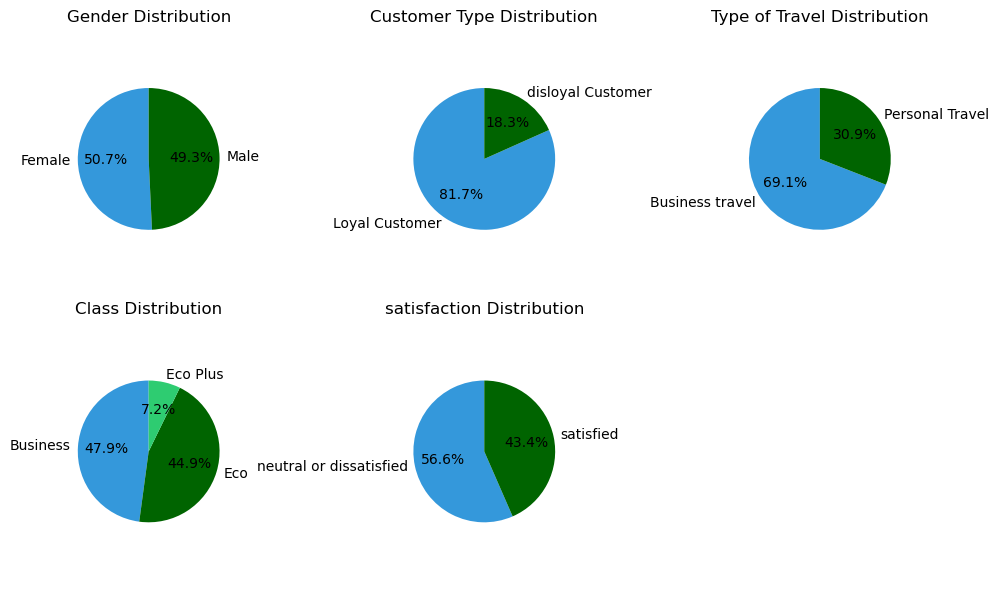

In [101]:
# List of categorical columns to visualize
columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
# Create a figure with multiple subplots (2 rows, 3 columns layout)
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()

# Loop through each column and create a pie chart
for i, column in enumerate(columns):
    counts = df[column].value_counts()
    labels = counts.index
    sizes = counts.values
    
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=palette)
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    axes[i].set_title(f'{column} Distribution')

# Hide the last empty subplot if necessary
if len(columns) < len(axes):
    fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()
plt.show()

CONCLUSION:  
- Same distribution of genders in giving feedback
- Majority of customers are loyal 80%
- Majority of travel is done for business 70%
- Business Class and Eco are almost in the same percentage 45%. Only 7% in Eco Plus
- we have a balance DataFrame

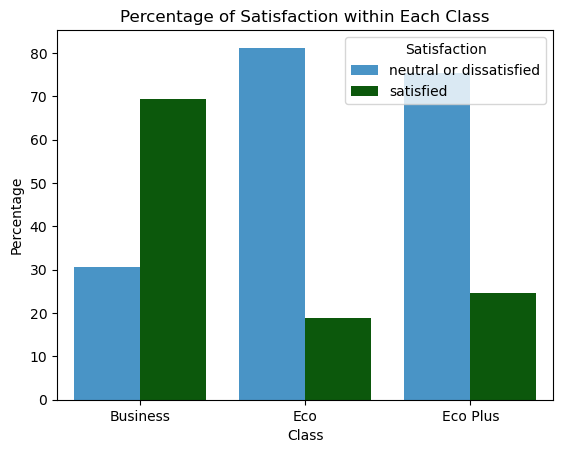

In [118]:
# Step 1: Group by Class and satisfaction, and calculate the counts
df_grouped = df.groupby(['Class', 'satisfaction']).size().reset_index(name='count')

# Step 2: Calculate the percentage within each Class group
df_grouped['percentage'] = df_grouped.groupby('Class')['count'].transform(lambda x: (x / x.sum()) * 100)

# Step 3: Plot the percentages instead of counts
#plt.figure(figsize=(8, 6))
sns.barplot(x='Class', y='percentage', hue='satisfaction', data=df_grouped, palette=['#3498db', '#006400'])

# Add labels and title
plt.title('Percentage of Satisfaction within Each Class')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.legend(title='Satisfaction')
plt.show()
None

CONCLUSION : Most satisfied customers are travelling business class
Not satisfied are the ones from the less expensive classes. For Eco Plus we do not have so many datapoints.

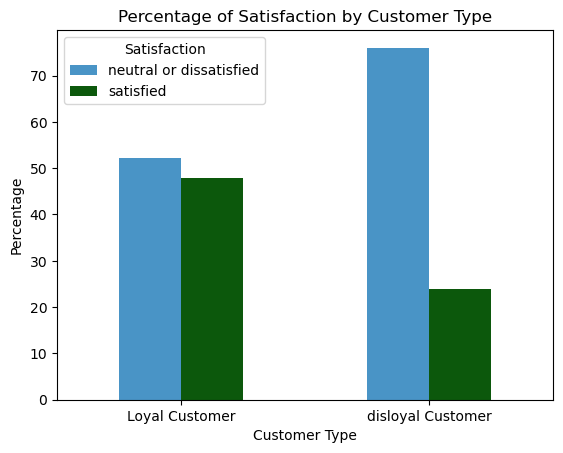

In [115]:
# Step 1: Group by Customer Type and satisfaction, and calculate the counts
df_grouped = df.groupby(['Customer Type', 'satisfaction']).size().reset_index(name='count')

# Step 2: Calculate the percentage for each Customer Type group
df_grouped['percentage'] = df_grouped.groupby('Customer Type')['count'].transform(lambda x: (x / x.sum()) * 100)

# Step 3: Plot the percentages
#plt.figure(figsize=(8, 6))
sns.barplot(x='Customer Type', y='percentage', hue='satisfaction', data=df_grouped, palette=['#3498db', '#006400'], width=0.5)

# Add labels and title
plt.title('Percentage of Satisfaction by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Percentage')
plt.legend(title='Satisfaction')
plt.show()

CONCLUSION:  
- Loyal Customers show the same percentace of satisfaction / non-satisfaction
- Disloyal Customers are mostly disatisfied

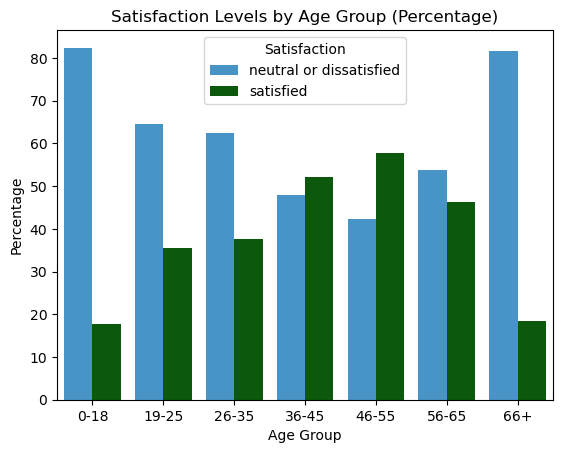

In [110]:
# Step 1: Create age bins (you can customize the bins as needed)
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # Define age groups
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Step 2: Calculate the percentage of each satisfaction level within each age group
df_grouped = df.groupby(['age_group', 'satisfaction']).size().reset_index(name='count')

# Calculate the percentage for each age group
df_grouped['percentage'] = df_grouped.groupby('age_group')['count'].transform(lambda x: (x / x.sum()) * 100)

# Step 3: Plot the percentages instead of counts
#plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='percentage', hue='satisfaction', data=df_grouped, palette=['#3498db', '#006400'])  # Custom palette with blue and dark green

plt.title('Satisfaction Levels by Age Group (Percentage)')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Satisfaction')
plt.show()

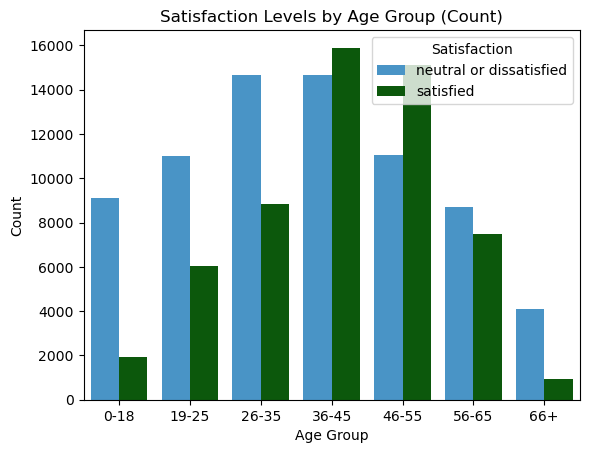

In [128]:
# Step 2: Create a countplot to show satisfaction counts for each age group
#plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='satisfaction', data=df, palette=['#3498db', '#006400'])

# Add labels and title
plt.title('Satisfaction Levels by Age Group (Count)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Satisfaction', labels=['neutral or dissatisfied', 'satisfied'])

# Show the plot
plt.show()

CONCLUSION:  
Mostly satisfied are the group ages 36-55.  
Almost 50 -50 for the group 56-65.  
Low satisfaction we have for the groups of very young 0-35 and 66+.  

Check Departure Delays and which type of trips it affects more. Or which Class is affected more.

c:\Users\kathe\miniconda3\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\kathe\miniconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\kathe\miniconda3\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(*plot_args, **plot_kwargs)
c:\Users\kathe\miniconda3\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(*plot_args, **plot_kwargs)
c:\Users\kathe\miniconda3\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(*plot_args, **plot_kwargs)


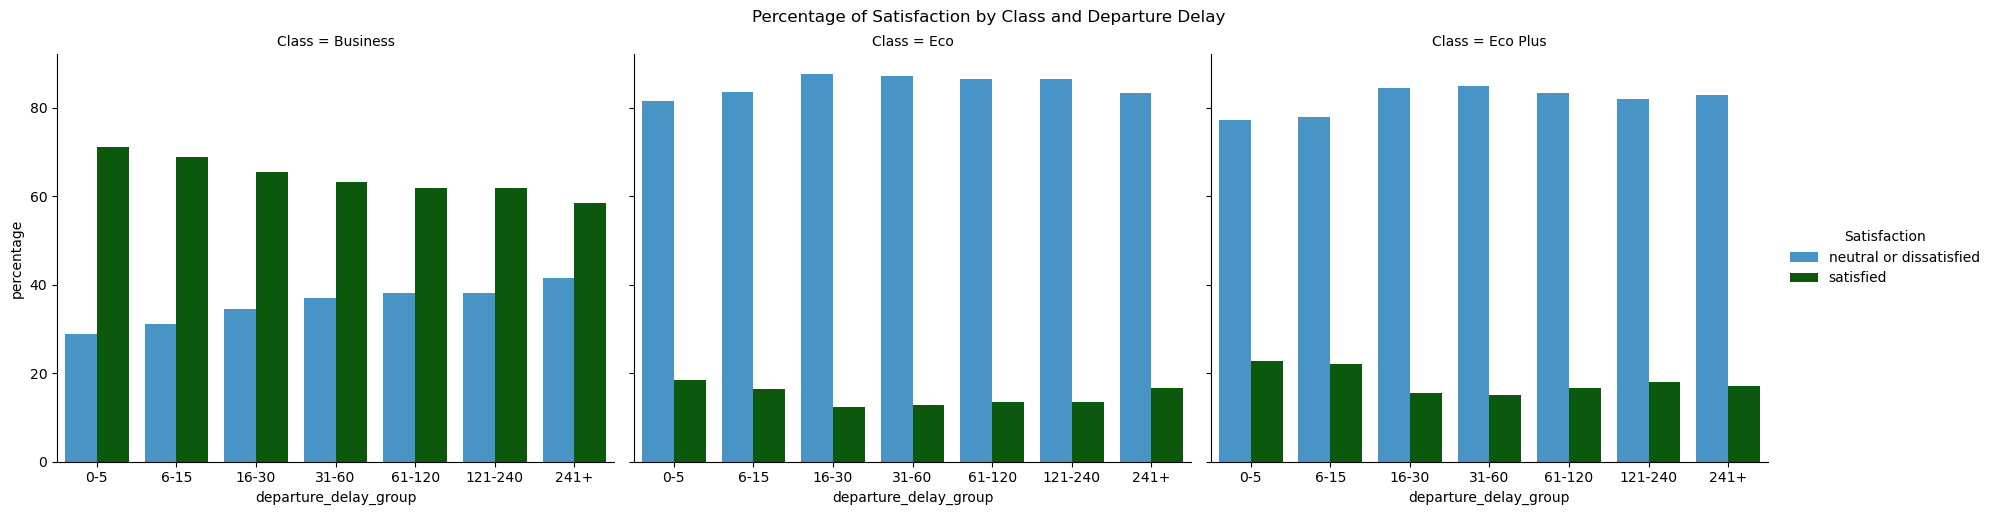

In [105]:
# Step 1: Define new bins based on the range of delay times
bins = [0, 5, 15, 30, 60, 120, 240, 1592]  # Bins from 0 to 1592 (max delay)
labels = ['0-5', '6-15', '16-30', '31-60', '61-120', '121-240', '241+']
df['departure_delay_group'] = pd.cut(df['Departure Delay in Minutes'], bins=bins, labels=labels)

# Step 2: Group by Class, Departure Delay Bins, and Satisfaction and Calculate Percentages
df_class = df.groupby(['departure_delay_group', 'Class', 'satisfaction']).size().reset_index(name='count')
df_class['percentage'] = df_class.groupby(['departure_delay_group', 'Class'])['count'].transform(lambda x: (x / x.sum()) * 100)

# FacetGrid to create subplots by Class
g = sns.FacetGrid(df_class, col='Class', height=5, aspect=1.2)
g.map(sns.barplot, 'departure_delay_group', 'percentage', 'satisfaction', palette=palette)
g.add_legend(title='Satisfaction')
plt.suptitle('Percentage of Satisfaction by Class and Departure Delay', y=1.02)
plt.show()
None

c:\Users\kathe\miniconda3\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\kathe\miniconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\kathe\miniconda3\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(*plot_args, **plot_kwargs)
c:\Users\kathe\miniconda3\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(*plot_args, **plot_kwargs)


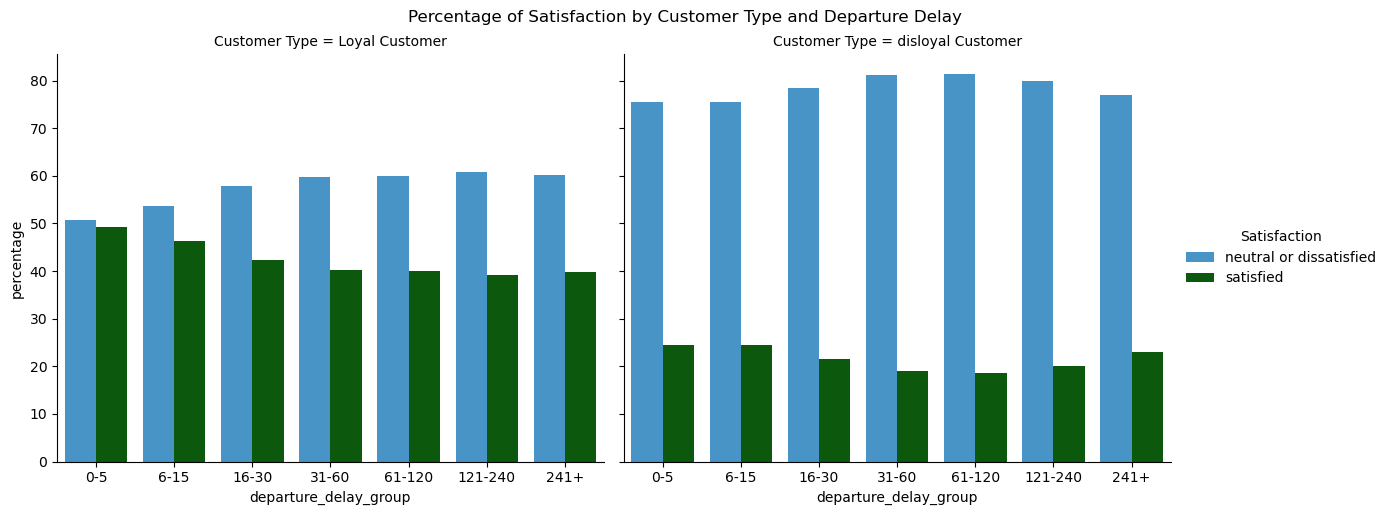

In [106]:
# Step 1: Calculate percentages for each Customer Type
df_customer = df.groupby(['departure_delay_group', 'Customer Type', 'satisfaction']).size().reset_index(name='count')
df_customer['percentage'] = df_customer.groupby(['departure_delay_group', 'Customer Type'])['count'].transform(lambda x: (x / x.sum()) * 100)

# Step 2: Create FacetGrid for Customer Type
g = sns.FacetGrid(df_customer, col='Customer Type', height=5, aspect=1.2)
g.map(sns.barplot, 'departure_delay_group', 'percentage', 'satisfaction', palette=palette)
g.add_legend(title='Satisfaction')
plt.suptitle('Percentage of Satisfaction by Customer Type and Departure Delay', y=1.02)
plt.show()

c:\Users\kathe\miniconda3\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\kathe\miniconda3\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(*plot_args, **plot_kwargs)
c:\Users\kathe\miniconda3\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(*plot_args, **plot_kwargs)


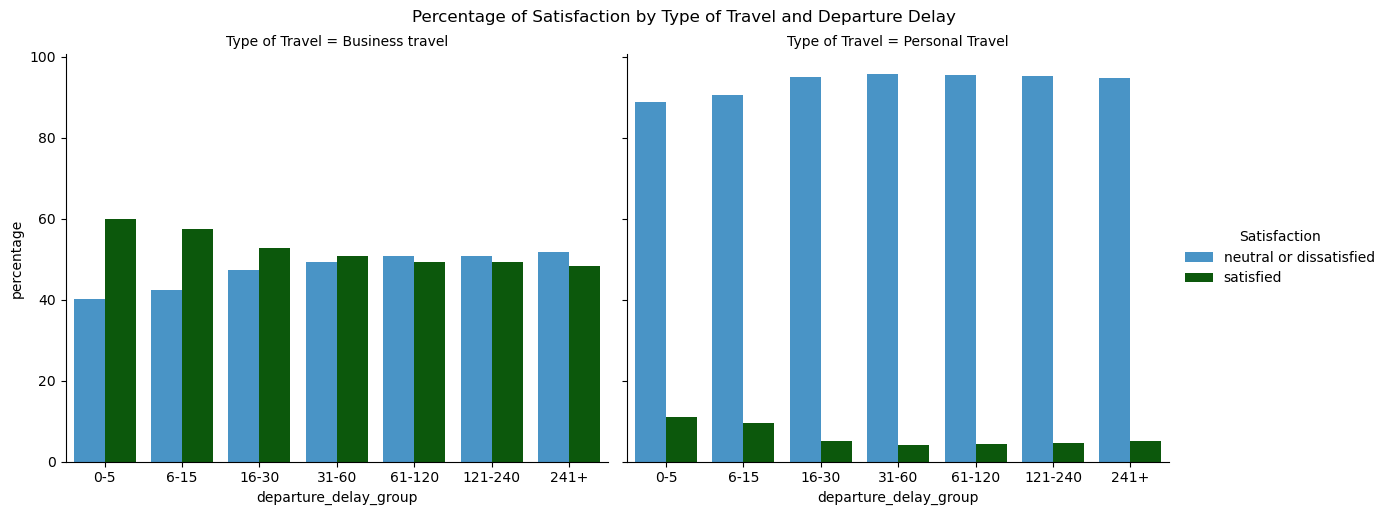

In [107]:
# Step 1: Group by and calculate the percentage for Type of Travel and satisfaction
df_grouped = df.groupby(['departure_delay_group', 'Type of Travel', 'satisfaction']).size().reset_index(name='count')
df_grouped['percentage'] = df_grouped.groupby(['departure_delay_group', 'Type of Travel'])['count'].transform(lambda x: (x / x.sum()) * 100)

# Step 2: Create a FacetGrid for Type of Travel, showing the percentage of satisfied vs dissatisfied
g = sns.FacetGrid(df_grouped, col='Type of Travel', height=5, aspect=1.2)
g.map(sns.barplot, 'departure_delay_group', 'percentage', 'satisfaction', palette=palette, hue_order=['neutral or dissatisfied', 'satisfied'])

# Add the legend and title
g.add_legend(title='Satisfaction')
plt.suptitle('Percentage of Satisfaction by Type of Travel and Departure Delay', y=1.02)
plt.show()
None

CONCLUSION:
- Largest percentage of ECO and ECO Plus are disatisfied, regardless of the flight delay
- Group that is mostly satisfied is the BUSINESS class which is satisfied again regardless of the DELAY. For larger delays there is a slight decline in satisfaction and more disatisfaction occurring.
- Disloyal Customers have a high percentage of being disatisfied - small percentage of them might be satrisfied , again regardless of the delay
- Loyal Customers have a higher percentage of disatisfaction although this drops with increasing delays
- Personal Travellers are mostly disatisfied
- For Business Travellers Satisfaction and Disatisfaction is in equal proportions for large delays but for smaller delays the satisfaction is higher.

c:\Users\kathe\miniconda3\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


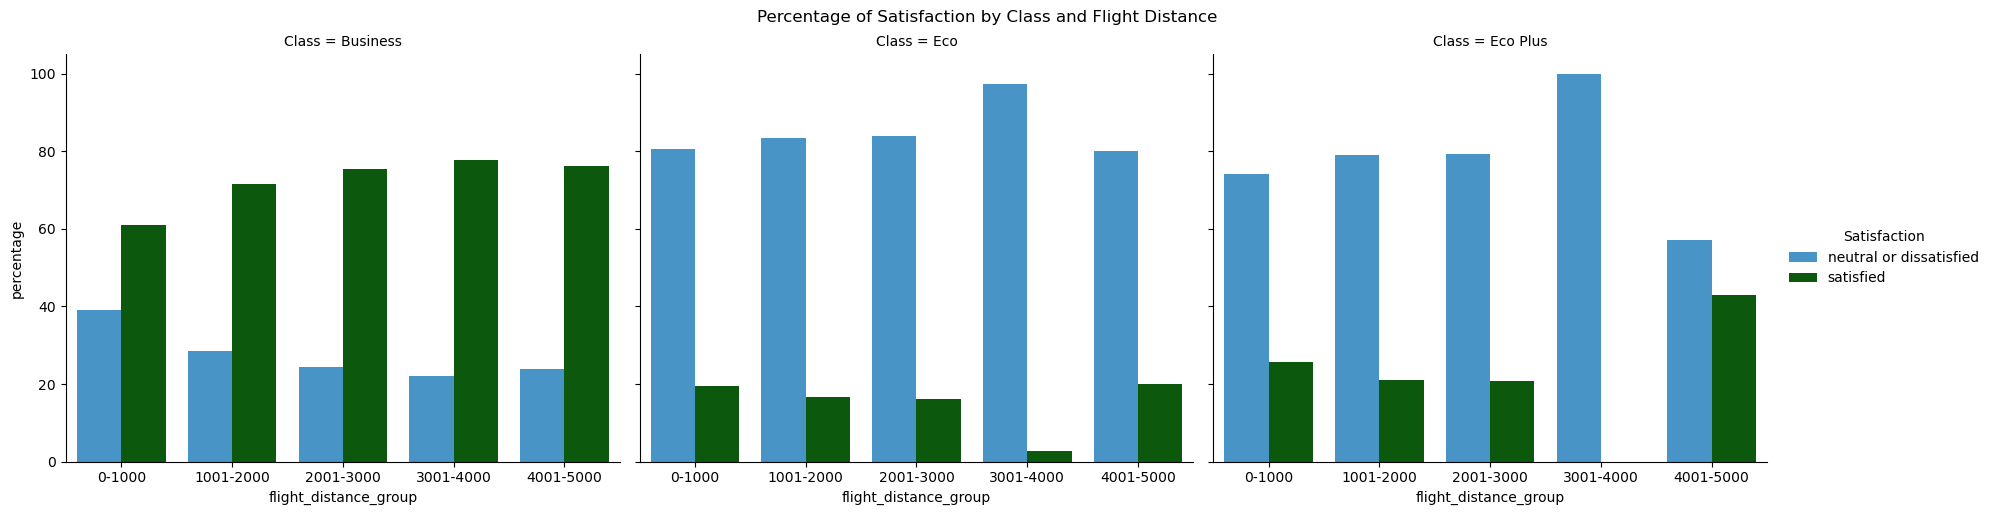

c:\Users\kathe\miniconda3\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


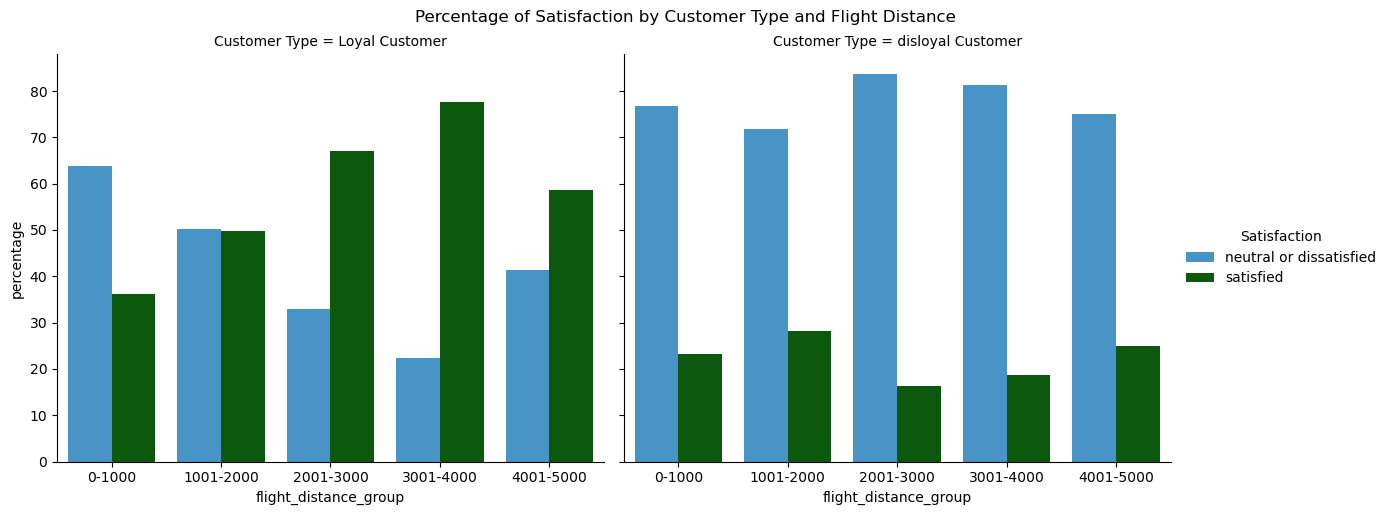

c:\Users\kathe\miniconda3\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


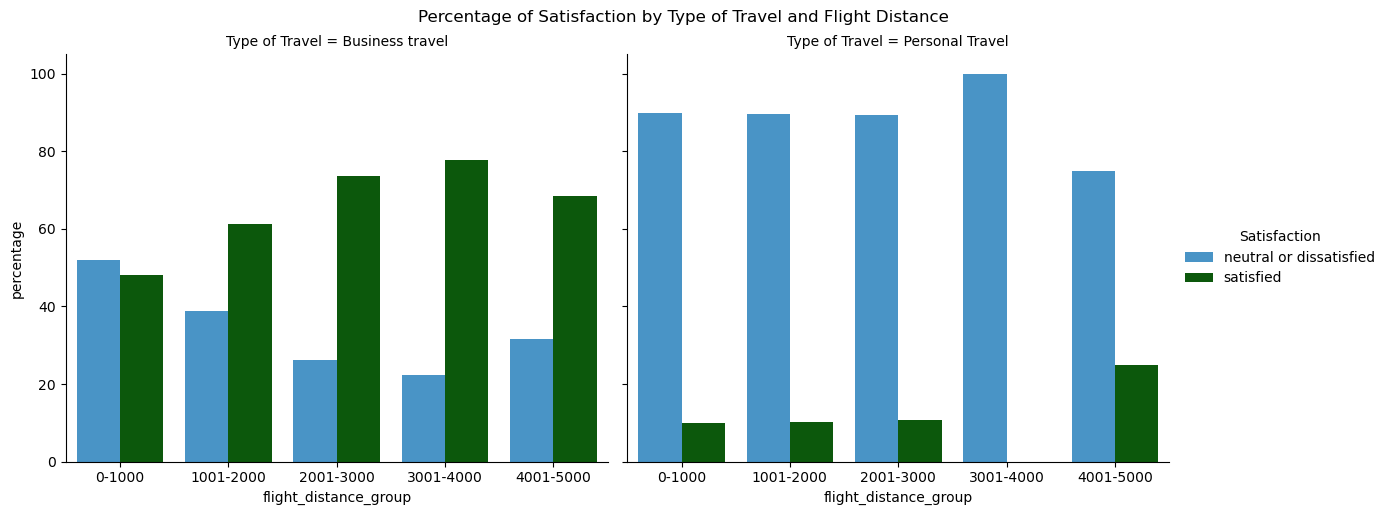

In [120]:
# Step 1: Define bins for Flight Distance
bins = [0, 1000, 2000, 3000, 4000, 5000]  # Adjust the bins as needed
labels = ['0-1000', '1001-2000', '2001-3000', '3001-4000', '4001-5000']
df['flight_distance_group'] = pd.cut(df['Flight Distance'], bins=bins, labels=labels)

# Step 2: Group by and calculate the percentage for each group
# For Class
df_grouped_class = df.groupby(['flight_distance_group', 'Class', 'satisfaction']).size().reset_index(name='count')
df_grouped_class['percentage'] = df_grouped_class.groupby(['flight_distance_group', 'Class'])['count'].transform(lambda x: (x / x.sum()) * 100)

# Step 3: Create a FacetGrid for Class, showing the percentage of satisfied vs dissatisfied
g_class = sns.FacetGrid(df_grouped_class, col='Class', height=5, aspect=1.2)
g_class.map(sns.barplot, 'flight_distance_group', 'percentage', 'satisfaction', palette=['#3498db', '#006400'], hue_order=['neutral or dissatisfied', 'satisfied'])

# Add the legend and title
g_class.add_legend(title='Satisfaction')
plt.suptitle('Percentage of Satisfaction by Class and Flight Distance', y=1.02)
plt.show()

# Step 4: Repeat for Customer Type
df_grouped_customer = df.groupby(['flight_distance_group', 'Customer Type', 'satisfaction']).size().reset_index(name='count')
df_grouped_customer['percentage'] = df_grouped_customer.groupby(['flight_distance_group', 'Customer Type'])['count'].transform(lambda x: (x / x.sum()) * 100)

g_customer = sns.FacetGrid(df_grouped_customer, col='Customer Type', height=5, aspect=1.2)
g_customer.map(sns.barplot, 'flight_distance_group', 'percentage', 'satisfaction', palette=['#3498db', '#006400'], hue_order=['neutral or dissatisfied', 'satisfied'])

g_customer.add_legend(title='Satisfaction')
plt.suptitle('Percentage of Satisfaction by Customer Type and Flight Distance', y=1.02)
plt.show()

# Step 5: Repeat for Type of Travel
df_grouped_travel = df.groupby(['flight_distance_group', 'Type of Travel', 'satisfaction']).size().reset_index(name='count')
df_grouped_travel['percentage'] = df_grouped_travel.groupby(['flight_distance_group', 'Type of Travel'])['count'].transform(lambda x: (x / x.sum()) * 100)

g_travel = sns.FacetGrid(df_grouped_travel, col='Type of Travel', height=5, aspect=1.2)
g_travel.map(sns.barplot, 'flight_distance_group', 'percentage', 'satisfaction', palette=['#3498db', '#006400'], hue_order=['neutral or dissatisfied', 'satisfied'])

g_travel.add_legend(title='Satisfaction')
plt.suptitle('Percentage of Satisfaction by Type of Travel and Flight Distance', y=1.02)
plt.show()


CONCLUSIONS:
- ECO and ECO Plus are generally disatisfied in very high percentages for all travel durations. Only for Long Flights and for the ECO Plus Group the percentages of satisfied and disatisfied are almost equal
- ECO and ECO PLUS have no satisfaction percentage for the duration of 3000 - 4000 mins. See what is happening in those flights
- Business Class is satisfied in higher percentages for all travel durations
- Disloyal customers have a higher proportion of disatisfaction for all travel durations
- Loyal Customers have increasing proportions of satisfaction for larger travel durations. For 30 - 1000 mins, there is a larger proportion of loyal customers being disatisfied over the satisfied ones ! See again what is happening in those flights
- Personal Travelers have a highest proportion of being disatisfied for all travel durations. See again the  3000 - 4000 mins with no satisfaction rates
- Business Travelers have increasing proportions of satisfaction as the distance increases.



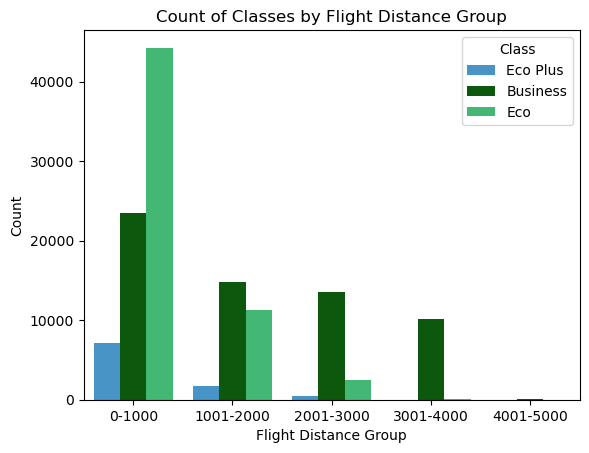

C:\Users\kathe\AppData\Local\Temp\ipykernel_50380\3260988992.py:19: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x='flight_distance_group', hue='Customer Type', data=df,palette= palette)


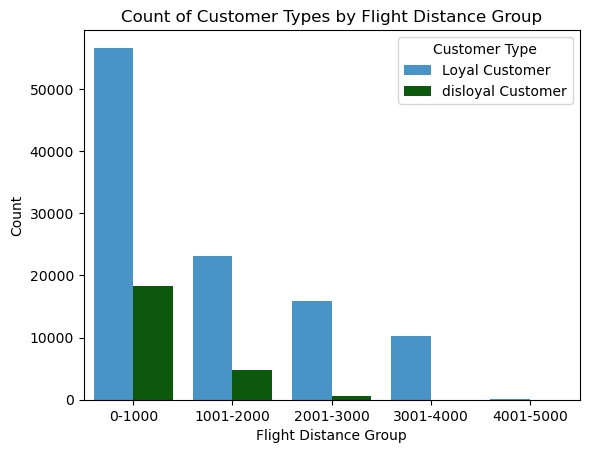

C:\Users\kathe\AppData\Local\Temp\ipykernel_50380\3260988992.py:28: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x='flight_distance_group', hue='Type of Travel', data=df,palette= palette)


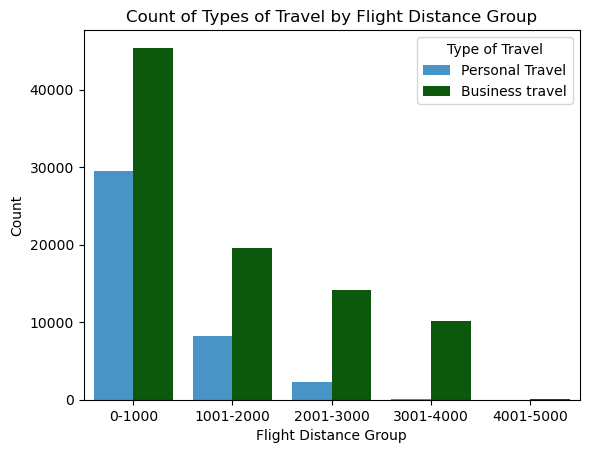

In [123]:
# Step 1: Define bins for Flight Distance
bins = [0, 1000, 2000, 3000, 4000, 5000]  # Adjust the bins as needed
labels = ['0-1000', '1001-2000', '2001-3000', '3001-4000', '4001-5000']
df['flight_distance_group'] = pd.cut(df['Flight Distance'], bins=bins, labels=labels)

# Step 2: Create bar plots for each category

# 1. Plot for Class counts in each flight distance bin
#plt.figure(figsize=(10, 6))
sns.countplot(x='flight_distance_group', hue='Class', data=df, palette= palette)
plt.title('Count of Classes by Flight Distance Group')
plt.xlabel('Flight Distance Group')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()

# 2. Plot for Customer Type counts in each flight distance bin
#plt.figure(figsize=(10, 6))
sns.countplot(x='flight_distance_group', hue='Customer Type', data=df,palette= palette)
plt.title('Count of Customer Types by Flight Distance Group')
plt.xlabel('Flight Distance Group')
plt.ylabel('Count')
plt.legend(title='Customer Type')
plt.show()

# 3. Plot for Type of Travel counts in each flight distance bin
#plt.figure(figsize=(10, 6))
sns.countplot(x='flight_distance_group', hue='Type of Travel', data=df,palette= palette)
plt.title('Count of Types of Travel by Flight Distance Group')
plt.xlabel('Flight Distance Group')
plt.ylabel('Count')
plt.legend(title='Type of Travel')
plt.show()


CONCLISION:  
- Most customers are traveling in short flights  0-1000 mins, and belong to the ECO (cheapest group), followed by the business class. We know before hand that we do not have many ECO PLUS customers. This is either due to the dataset or due to a fault in how ECO PLUS is prices. Inform Pricing Unit
- Most customers in all flight distances are Loyal
- Most types of travel for all distances are Business Travel
- Personal travel is usually shorter thatn 2000 mins
- Flight Durations larger than 4000 mins are not used frequently at all.

In [125]:
#We create this feature to use it below in HeatMaps, and also to use it as our target value for the MODELs to be trained.
df['satisfacton_bin'] = df['satisfaction'].apply(lambda x: 0 if x == 'neutral or dissatisfied' else 1)

When features are clustered like in the case of the service features which are the feedback of clients in a scale of 0-5,
it is very convenient to create heatmaps, since it gives information on how variables are correlated.

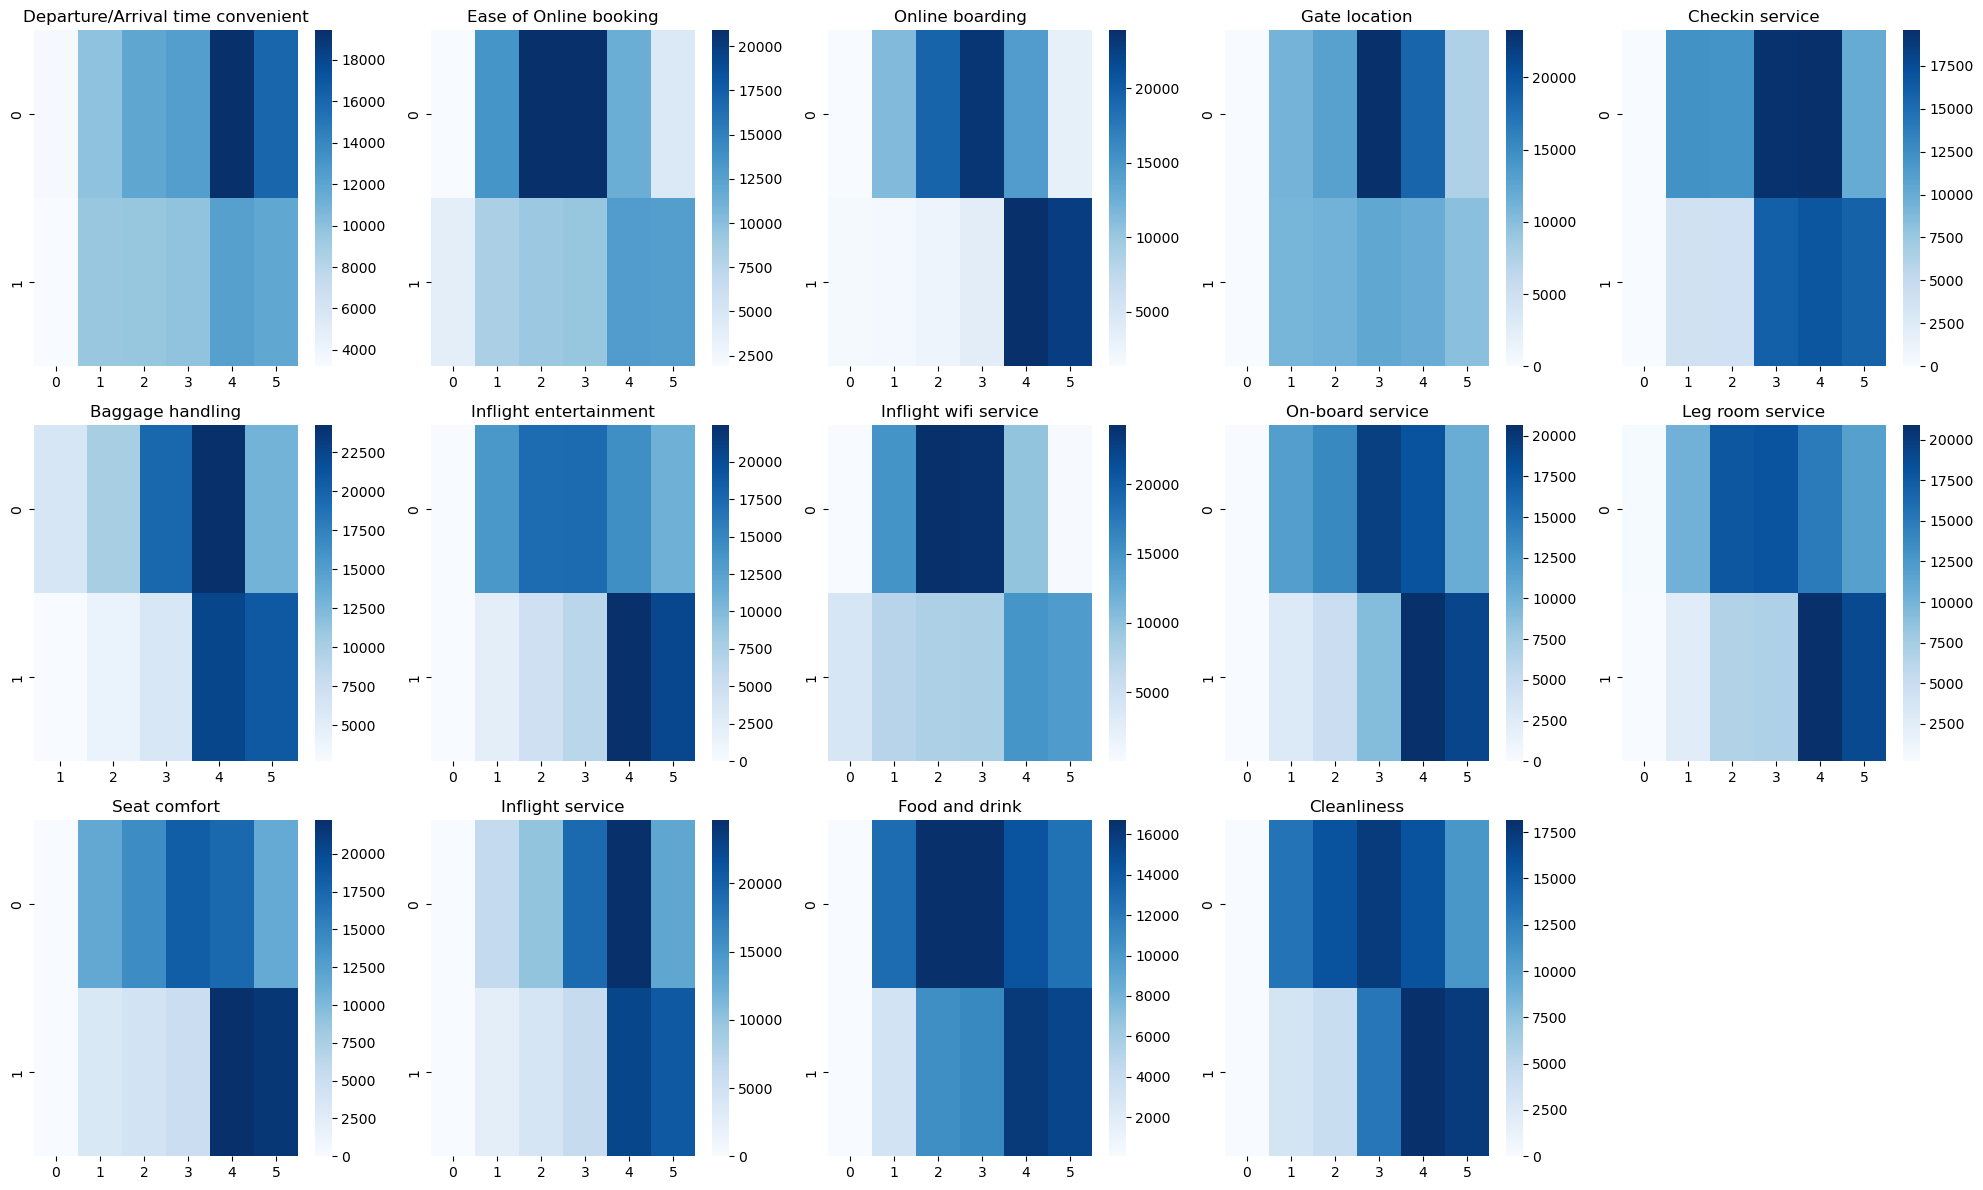

In [126]:
# List of service features
service_features = [
    'Departure/Arrival time convenient', 'Ease of Online booking', 
    'Online boarding', 'Gate location', 'Checkin service','Baggage handling', 
    'Inflight entertainment', 'Inflight wifi service','On-board service', 'Leg room service', 'Seat comfort',
     'Inflight service', 'Food and drink', 'Cleanliness'
]

# Create a figure with subplots (3 rows x 5 columns for example)
num_features = len(service_features)
rows = 3  # Define the number of rows
cols = 5  # Define the number of columns
fig, axes = plt.subplots(rows, cols, figsize=(20, 12))  # Adjust the figure size to fit all subplots

# Flatten axes array for easy iteration
axes = axes.flatten()

# Step 1: Create grouped data and visualize each feature against satisfaction_bin
for i, feature in enumerate(service_features):
    # Step 2: Group by 'satisfaction_bin' and feature rating, then count occurrences
    grouped_data = df.groupby(['satisfacton_bin', feature]).size().unstack(fill_value=0)
    
    # Step 3: Create a heatmap for the current feature
    sns.heatmap(grouped_data, cmap='Blues', ax=axes[i], cbar=True)
    axes[i].set_title(feature)  # Set the title for each subplot
    axes[i].set_ylabel('')  # Remove the y-axis label for cleaner look
    axes[i].set_xlabel('')  # Remove the x-axis label for cleaner look

# Remove any empty axes (if there are fewer subplots than grid spaces)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout so that subplots don't overlap
plt.tight_layout()

# Show the figure
plt.show()


CONCLUSION:
- Voting High (>=4) but still disatisfied for:
Departure/Arrival Time, Checkin Services, Baggage Handling, Inflight Service
- Voting Low (<=3) and beign disatisfied:
Ease of online booking, Online Boarding, Gate Location, Inflight Wifi, Food and drink, Cleanliness
- Voting High (>=4) and being satisfied:
Online Boarding, Food and drink, Baggage Handling, Inflight entertainment, Inflight service,  
On-board service, Leg room service, Seat Comfort, Cleanliness

Satisfied Customers have voted very high for:  
Online Boarding, Food and drink, Baggage Handling, Inflight entertainment, Inflight service,  
On-board service, Leg room service, Seat Comfort, Cleanliness

Disatisfied Customers have voted very low for:  
Ease of online booking, Online Boarding, Gate Location, Checkin Service, Inflight Wifi, Food and drink, Cleanliness

Not a reason for disatisfaction:  
Departure/Arrival Time Convenient, Checkin Services, Baggage Handling, Inflight Service

IDEAS from https://www.kaggle.com/code/chandrimad31/flight-passenger-satisfaction-eda-and-prediction